In [1]:
import visualization_tools as vt
import generator as gen

/home/ubuntu/micromamba/envs/coronal-diffusion-modeling/lib/python3.12/site-packages/ai/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


# Basic Usage

In [14]:
G, H = gen.sample(weights_file="attention_10.pth", nsteps=100, radio_flux=.1)

In [15]:

vt.OUTER_BOUNDARY = 2.5
sh = vt.SHVisualizer(G, H)  
sh.visualize_field_lines(grid_density=20, r=1.1, closed_only=False)

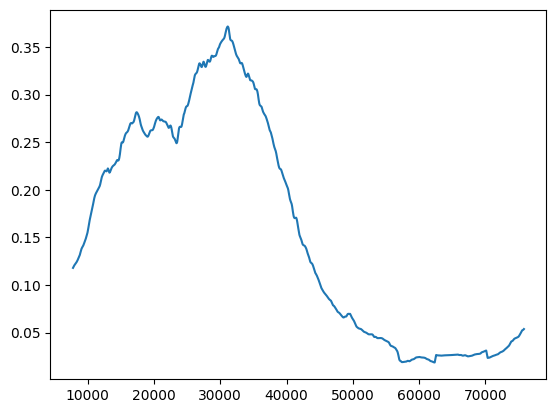

In [ ]:
import h5py
hdf = h5py.File("training_dataset.h5", "r")
radio_fluxes = hdf['radio_fluxes'][:]
hdf.close()
import pylab as plt
import numpy as np
import pandas as pd


#adjusted_flux_smoothed = pd.Series(radio_fluxes).rolling(window=n*27*12).mean()
plt.plot(radio_fluxes)